# Employee Attrition & Workforce Planning (HR Analytics)

## Introduction
Employee attrition is one of the most critical challenges faced by organizations today. High turnover rates not only disrupt business continuity but also create significant financial costs in terms of rehiring, onboarding, and lost productivity. According to industry studies, replacing an employee can cost between 30%–200% of their annual salary, depending on the role and seniority.

This project simulates a workforce planning problem where the objective is to:<br>
  ~Analyze patterns and drivers of employee attrition (e.g., tenure, salary, job role, performance).<br> 
  ~Identify high-risk employee groups to help HR design targeted retention strategies.<br>
  ~Quantify the potential cost savings associated with reducing attrition.<br>
  ~Create an interactive dashboard in Power BI to communicate insights effectively to HR leaders.

By combining Python (EDA, data cleaning, statistical analysis) with Power BI (visual storytelling, what-if analysis), this project bridges the gap between raw data and actionable business insights.

## Problem Statement:
High employee attrition leads to increased hiring costs, loss of expertise, and reduced productivity. This project aims to analyze workforce data to identify the key factors driving attrition and provide actionable insights for HR to design effective retention strategies.

## Dataset Columns and Description

**Age** → Age of the employee.<br>
**Attrition** → Whether the employee left the company (Yes/No → target variable).<br>
**BusinessTravel** → Frequency of business travel (Rarely, Frequently, Non-Travel).<br>
**DailyRate** → Daily salary rate of the employee.<br>
**Department** → Department of the employee (Sales, R&D, HR).<br>
**DistanceFromHome** → Distance between employee’s home and workplace.<br>
**Education** → Education level (1 = Below College, 2 = College, 3 = Bachelor, 4 = Master, 5 = Doctor).<br>
**EducationField** → Field of education (Life Sciences, Medical, Marketing, Technical, etc.).<br>
**EmployeeCount** → Number of employees (constant = 1 for all rows, not useful).<br>
**EmployeeNumber** → Unique ID for each employee (identifier, not useful for modeling).<br>
**EnvironmentSatisfaction** → Work environment satisfaction (1 = Low, 4 = Very High).<br>
**Gender** → Gender of the employee (Male/Female).<br>
**HourlyRate** → Hourly salary rate.<br>
**JobInvolvement** → Level of involvement in the job (1 = Low, 4 = Very High).<br>
**JobLevel** → Job level in the company hierarchy (1 = Entry-level, higher = senior roles).<br>
**JobRole** → Job designation (e.g., Sales Executive, Research Scientist, Manager).<br>
**JobSatisfaction** → Satisfaction with the job role (1 = Low, 4 = Very High).<br>
**MaritalStatus** → Marital status (Single, Married, Divorced).<br>
**MonthlyIncome** → Monthly salary of the employee.<br>
**MonthlyRate** → Monthly rate (less meaningful, often ignored).<br>
**NumCompaniesWorked*** → Total number of companies the employee has worked for.<br>
**Over18** → Whether employee is over 18 (constant = "Y", not useful).<br>
**OverTime** → Whether the employee works overtime (Yes/No).<br>
**PercentSalaryHike** → Percentage increase in salary during the last appraisal.<br>
**PerformanceRating** → Performance rating (1–4 scale, usually 3 or 4).<br>
**RelationshipSatisfaction** → Satisfaction with relationships at work (1 = Low, 4 = Very High).<br>
**StandardHours** → Standard working hours (constant = 80, not useful).<br>
**StockOptionLevel** → Stock option level granted (0–3).<br>
**TotalWorkingYears** → Total years of professional experience.<br>
**TrainingTimesLastYear** → Number of trainings attended last year.<br>
**WorkLifeBalance** → Self-reported work-life balance (1 = Bad, 4 = Excellent).<br>
**YearsAtCompany** → Total years worked at the current company.<br>
**YearsInCurrentRole** → Years spent in the current job role.<br>
**YearsSinceLastPromotion** → Years since the employee’s last promotion.<br>
**YearsWithCurrManager** → Years spent working with the current manager.<br>

## Purpose of Employee Attrition Analysis

### 1.Identify High-Risk Employees:
Understanding which employees are more likely to leave (e.g., those with low tenure, certain job roles, or lower salaries) helps HR proactively intervene.

### 2.Reduce Hiring and Training Costs:
Replacing employees is expensive. By reducing attrition, the company can save significant costs on recruitment, onboarding, and training.

### 3.Support Workforce Planning:
Insights from attrition trends allow HR to plan for staffing needs, allocate resources efficiently, and avoid talent gaps in critical roles.

### 4.Improve Employee Retention Strategies:
By analyzing factors driving attrition, HR can design targeted retention programs like career development, compensation adjustments, and recognition programs.

## Importing required libraries

In [1]:
# Importing required libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Loading and Getting a Glimpse of the Dataset
The dataset available is in .csv format, so I will load the dataset in csv format to start data analysis.

In [2]:
data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition-DIRTY.csv")

In [3]:
pd.set_option('display.max_columns', None)  # show all columns
data.head()            # exploring first five variables to identify anamolies in the data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,43.0,No,Travel_Rarely,177,Research & Development,8.0,3,Life Sciences,1,920,1,Female,55,3,2,Manufacturing Director,2.0,Divorced,4765.0,23814,4,Y,No,21,4,3,80,1,4,2,4,1,0,0,0
1,21.0,No,Travel_Rarely,996,Research & Development,3.0,2,Medical,1,379,4,Male,100,2,1,Research Scientist,3.0,Single,3230.0,10531,1,Y,No,17,3,1,80,0,3,4,4,3,2,1,0
2,31.0,No,Travel_Rarely,480,Research & Development,7.0,2,Medical,1,524,2,Female,31,3,2,Manufacturing Director,1.0,Married,4306.0,4156,1,Y,No,12,3,2,80,1,13,5,1,13,10,3,12
3,NaN,No,Non-Travel,1052,Sales,6.0,3,Medical,1,302,4,Female,57,2,3,Sales Executive,4.0,Single,8865.0,16840,6,Y,No,12,3,4,80,0,23,2,3,19,7,12,8
4,44.0,No,Travel_Rarely,1199,Research & Development,4.0,2,Life Sciences,1,1288,3,Male,92,4,5,Manager,1.0,Divorced,19190.0,17477,1,Y,No,14,3,4,80,2,26,4,2,25,9,14,13


In [4]:
data.shape              # Returns the number of rows and columns.

(1480, 35)

There are 1480 observations and 35 columns in the dataset as expected.

In [5]:
data.info()     # Checking the data types of each feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1396 non-null   float64
 1   Attrition                 1480 non-null   object 
 2   BusinessTravel            1480 non-null   object 
 3   DailyRate                 1480 non-null   int64  
 4   Department                1480 non-null   object 
 5   DistanceFromHome          1406 non-null   float64
 6   Education                 1480 non-null   int64  
 7   EducationField            1480 non-null   object 
 8   EmployeeCount             1480 non-null   int64  
 9   EmployeeNumber            1480 non-null   int64  
 10  EnvironmentSatisfaction   1480 non-null   int64  
 11  Gender                    1480 non-null   object 
 12  HourlyRate                1480 non-null   int64  
 13  JobInvolvement            1480 non-null   int64  
 14  JobLevel

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1396.0,37.451289,10.270523,18.0,30.00,36.0,43.00,90.0
DailyRate,1480.0,803.134459,404.213886,102.0,465.00,804.0,1159.00,1499.0
DistanceFromHome,1406.0,9.187055,8.124380,1.0,2.00,7.0,14.00,29.0
Education,1480.0,2.910135,1.024067,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1480.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1480.0,1021.834459,602.749932,1.0,485.75,1016.5,1554.25,2068.0
EnvironmentSatisfaction,1480.0,2.727703,1.093117,1.0,2.00,3.0,4.00,4.0
HourlyRate,1480.0,65.841892,20.327558,30.0,48.00,66.0,83.25,100.0
JobInvolvement,1480.0,2.729730,0.713954,1.0,2.00,3.0,3.00,4.0
JobLevel,1480.0,2.061486,1.105461,1.0,1.00,2.0,3.00,5.0


#### 📝 Conclusion Statement:<br>

**Age** has unrealistic max 90 → outlier.<br>
**MonthlyIncome** max 174,440 → outlier.<br>
**TotalWorkingYears** (0 years might mean freshers).<br>
**YearsAtCompany** (0 means new hires).<br>
**EmployeeCount** = 1 for all → drop.<br>
**StandardHours** = 80 for all → drop.

In [7]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
# checking total number of missing values in each feature
data.isnull().sum().sort_values(ascending= False)

Age                         84
MonthlyIncome               74
DistanceFromHome            74
JobSatisfaction             74
Attrition                    0
BusinessTravel               0
DailyRate                    0
EducationField               0
EmployeeCount                0
Department                   0
Education                    0
EnvironmentSatisfaction      0
EmployeeNumber               0
Gender                       0
HourlyRate                   0
JobLevel                     0
JobInvolvement               0
JobRole                      0
MaritalStatus                0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInC

Age column has more number of missing values<br>

In [9]:
# Convert to numeric (force errors to NaN)
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

# Verify again
print(data['Age'].dtype)

float64


In [10]:
# Imputation --> median for skewed data
data['Age'] = data['Age'].fillna(data['Age'].median())  # median for skewed data
data['MonthlyIncome'] = data['MonthlyIncome'].fillna(data['MonthlyIncome'].median())
data['JobSatisfaction'] = data['JobSatisfaction'].fillna(data['JobSatisfaction'].median())
data['DistanceFromHome'] = data['DistanceFromHome'].fillna(data['DistanceFromHome'].median())

In [11]:
print("Dataset shape:", data.shape)
print("Duplicate rows:", data.duplicated().sum())

# Remove duplicates
data = data.drop_duplicates()
print("After removing duplicates:", data.shape)


Dataset shape: (1480, 35)
Duplicate rows: 10
After removing duplicates: (1470, 35)


In [12]:
#Columns that don’t add value to EDA/business insights:
data = data.drop(columns=['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours', 
                      'DailyRate', 'HourlyRate', 'MonthlyRate'])


### Outlier Treatment using IQR (Capping Method)


In [13]:
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values at the bounds
    df[column] = np.where(df[column] < lower_bound, lower_bound,
                          np.where(df[column] > upper_bound, upper_bound, df[column]))

    print(f"{column} → Outliers capped between {lower_bound:.2f} and {upper_bound:.2f}")

# Apply for Age and MonthlyIncome
cap_outliers_iqr(data, 'Age')
cap_outliers_iqr(data, 'MonthlyIncome')

Age → Outliers capped between 13.00 and 61.00
MonthlyIncome → Outliers capped between -4611.75 and 15752.25


In [14]:
# Convert categorical columns
cat_cols = data.select_dtypes(include='object').columns
for col in cat_cols:
    data[col] = data[col].astype('category')


## Exploratory Data Analysis

## Basic Attrition Analysis

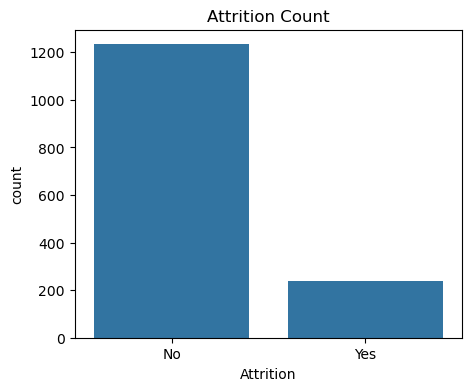

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Attrition distribution
plt.figure(figsize=(5,4))
sns.countplot(x='Attrition', data=data)
plt.title('Attrition Count')
plt.show()


Insight:
Most employees are retained, but a small segment is leaving → focus on high-risk groups.

## Demographics & Attrition

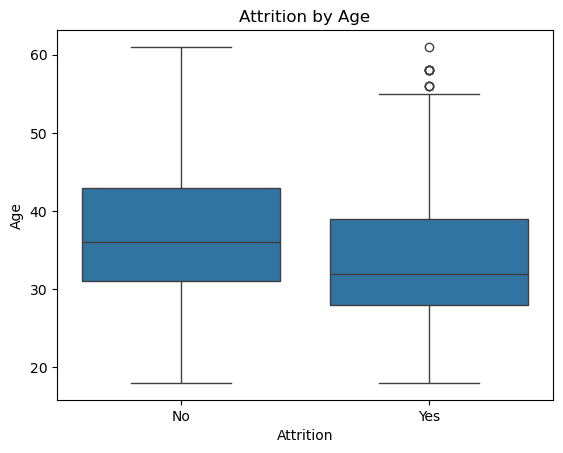

In [16]:
# Age vs Attrition
sns.boxplot(x='Attrition', y='Age', data=data)
plt.title('Attrition by Age')
plt.show()

Insights:
Younger employees may leave more frequently.

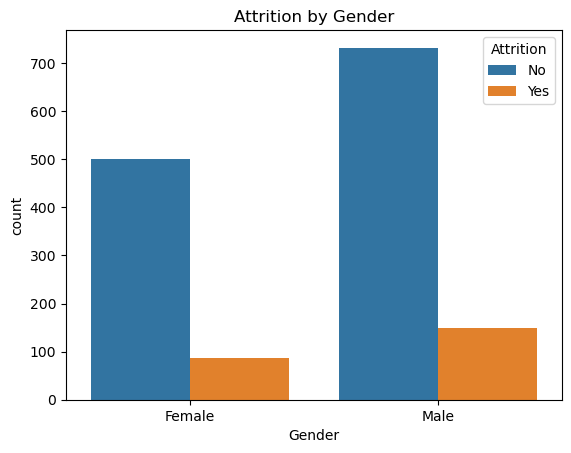

In [17]:
# Gender vs Attrition
sns.countplot(x='Gender', hue='Attrition', data=data)
plt.title('Attrition by Gender')
plt.show()

Insights:
Gender and marital status trends help HR in personalized retention strategies.

## Job & Role Analysis

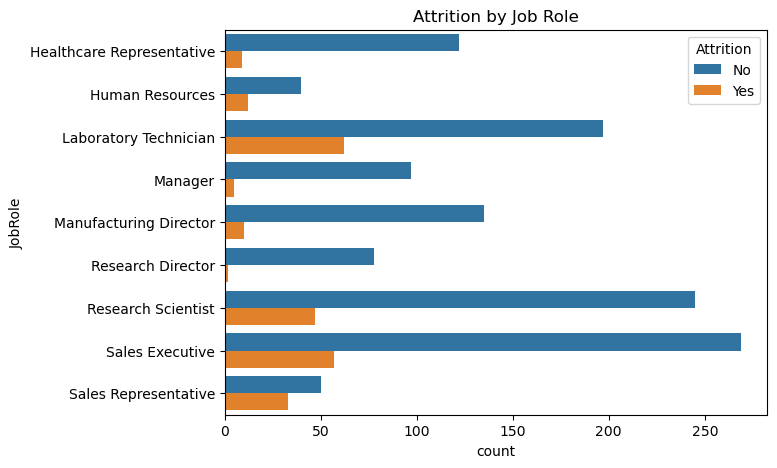

In [18]:
# Attrition by JobRole
plt.figure(figsize=(7,5))
sns.countplot(y='JobRole', hue='Attrition', data=data)
plt.title('Attrition by Job Role')
plt.show()

Insights:
Certain roles (Sales Executive,Laboratory Technician) have higher attrition.

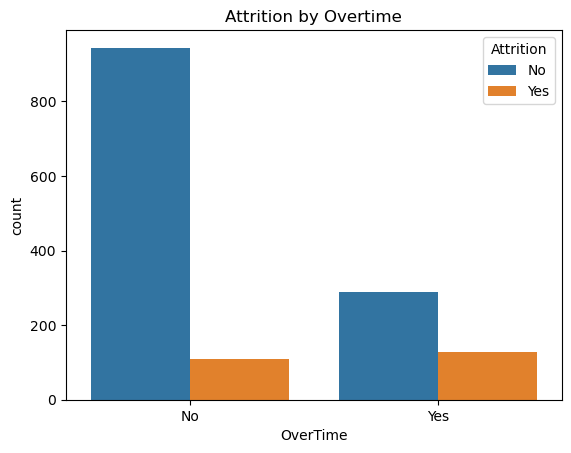

In [19]:
# Overtime vs Attrition
sns.countplot(x='OverTime', hue='Attrition', data=data)
plt.title('Attrition by Overtime')
plt.show()

Insights:
Employees working overtime may have higher churn → workload review needed.

## Compensation & Tenure Analysis

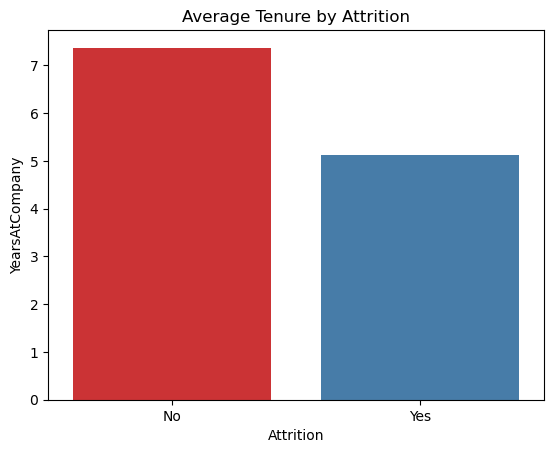

In [20]:
# Average Tenure
avg_tenure = data.groupby('Attrition')['YearsAtCompany'].mean().reset_index()
sns.barplot(x='Attrition', y='YearsAtCompany', data=avg_tenure, palette='Set1')
plt.title('Average Tenure by Attrition')
plt.show()

Insights:<br>
Short-tenured employees are at higher risk of leaving.<br>
HR should focus on onboarding, engagement, and early retention programs for new hires.

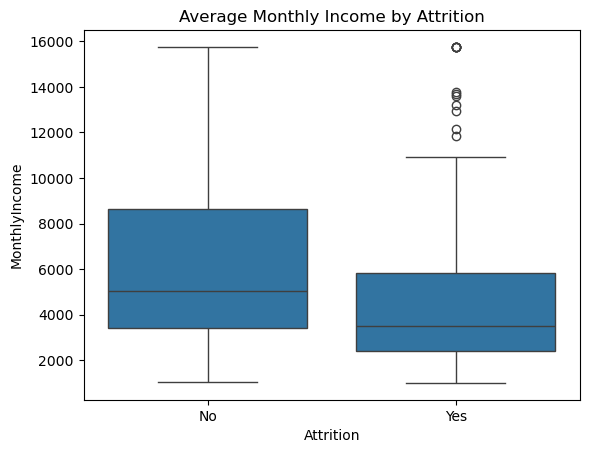

In [21]:
# Average monthly income
sns.boxplot(x='Attrition', y='MonthlyIncome', data=data)
plt.title('Average Monthly Income by Attrition')
plt.show()

Insights:<br>
Lower-paid employees are more likely to leave → Employees with lower income have higher attrition.

## Satisfaction & Performance

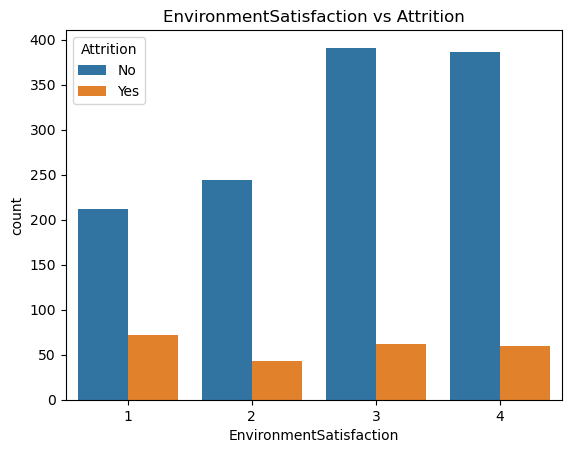

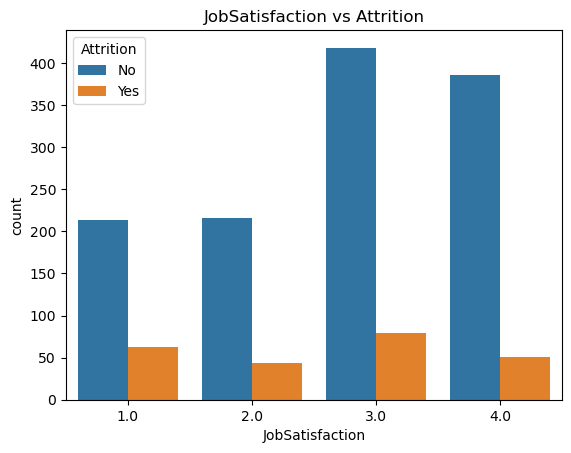

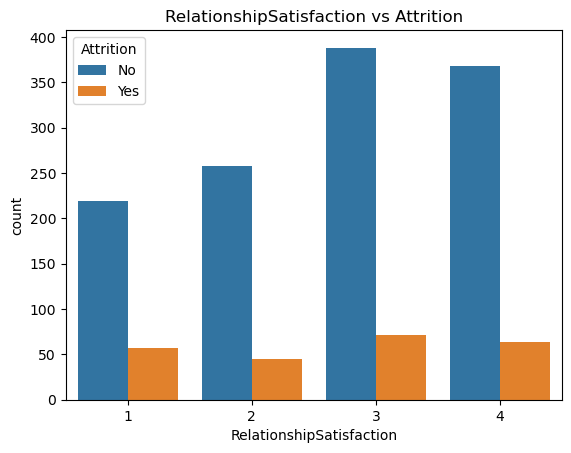

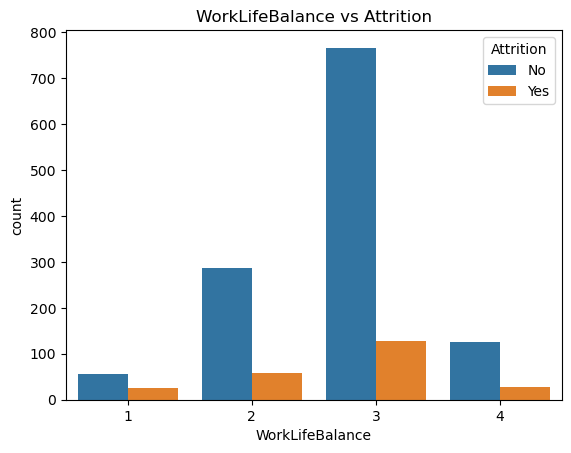

In [22]:
# Satisfaction vs Attrition
satisfaction_cols = ['EnvironmentSatisfaction','JobSatisfaction','RelationshipSatisfaction','WorkLifeBalance']
for col in satisfaction_cols:
    sns.countplot(x=col, hue='Attrition', data=data)
    plt.title(f'{col} vs Attrition')
    plt.show()


Insights:
Lower satisfaction & engagement → higher attrition.

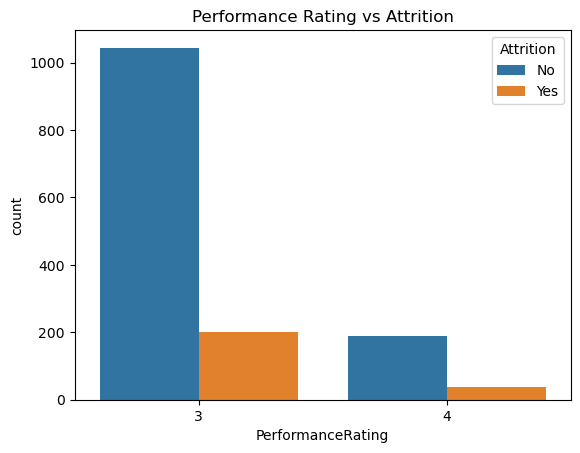

In [23]:
# Performance vs Attrition
sns.countplot(x='PerformanceRating', hue='Attrition', data=data)
plt.title('Performance Rating vs Attrition')
plt.show()

Insights:
Performance rating shows slightly higher churn for low performers → can link to incentives.

## Correlation Analysis

In [24]:
# Encode Attrition as numeric
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})
data['Attrition'] = pd.to_numeric(data['Attrition'], errors='coerce')

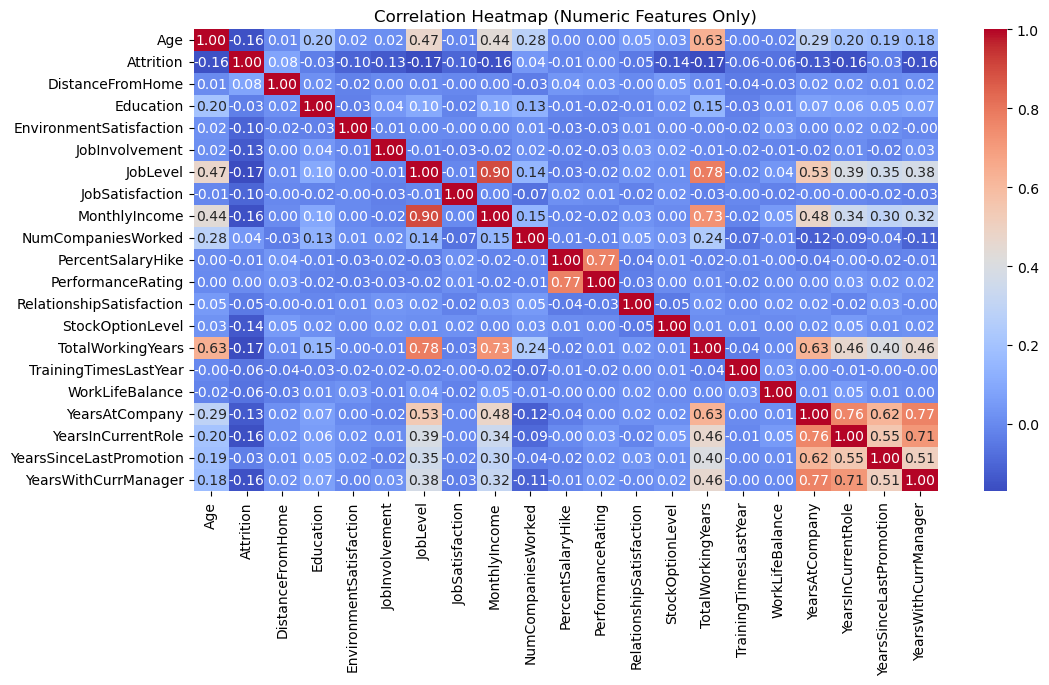

In [25]:

# Select only numeric columns
numeric_df = data.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12,6))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=True ,fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

### ✅ Conclusion: Insights on Employee Attrition (from Correlation Heatmap)<br>
**1.** Attrition has weak correlation with all numeric features — no strong single predictor.<br>
**2.** Lower tenure (less YearsAtCompany, TotalWorkingYears, YearsInCurrentRole) slightly increases attrition.<br>
**3.** Employees with more past jobs (NumCompaniesWorked) are a bit more likely to leave.<br>
**4.** Factors like Age, Salary, PerformanceRating show minimal impact on attrition.

## Key HR Metrics (KPI Calculations)

### 1 .Overall Attrition Rate

In [46]:
total_employees = data.shape[0]                                    # Total Employees
attrition_count = data[data['Attrition'] == 1].shape[0]            # Attrition Count
attrition_rate = (attrition_count / total_employees) * 100         # Attrition Rate
print(f"Overall Attrition Rate: {attrition_rate:.2f}%")

Overall Attrition Rate: 16.12%


### 2. Attrition Rate by Department

In [37]:
dept_attrition = data.groupby('Department')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
dept_attrition['Attrition Rate (%)'] = dept_attrition[1] * 100
dept_attrition[['Attrition Rate (%)']]

Attrition,Attrition Rate (%)
Department,
Human Resources,19.047619
Research & Development,13.839750
Sales,20.627803


In [ ]:
#### Conclusion:


### 3. Attrition Rate by Job Role

In [38]:
job_attrition = data.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
job_attrition['Attrition Rate (%)'] = job_attrition[1] * 100
job_attrition[['Attrition Rate (%)']].sort_values(by='Attrition Rate (%)', ascending=False)


Attrition,Attrition Rate (%)
JobRole,
Sales Representative,39.759036
Laboratory Technician,23.938224
Human Resources,23.076923
Sales Executive,17.484663
Research Scientist,16.095890
Manufacturing Director,6.896552
Healthcare Representative,6.870229
Manager,4.901961
Research Director,2.500000


### 4. Average Tenure of Attrited Employees

In [39]:
avg_tenure = data[data['Attrition'] == 1]['YearsAtCompany'].mean()
print(f"Average Tenure of Attrited Employees: {avg_tenure:.1f} years")

Average Tenure of Attrited Employees: 5.1 years


### 5. Overtime Impact on Attrition

In [42]:
overtime_attrition = data.groupby('OverTime')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
overtime_attrition['Attrition Rate (%)'] = overtime_attrition[1] * 100
overtime_attrition[['Attrition Rate (%)']]

Attrition,Attrition Rate (%)
OverTime,
No,10.436433
Yes,30.528846


## 📊 Final Conclusion & Business Insights

Based on the exploratory data analysis (EDA) and Power BI dashboard, the following insights were identified:

1. **Overall Attrition Rate**: ~16% of employees left the company.  
2. **High-Risk Groups**: 
   - Employees with **< 2 years of tenure** showed the highest attrition.  
   - **Sales Executives** had ~2.5× higher attrition risk compared to other roles.  
   - Employees working **OverTime** were significantly more likely to leave.  
3. **Department Impact**: Sales and R&D departments contributed to most of the churn.  
4. **Tenure Pattern**: Attrition is highest during the **first 2 years** of employment, then stabilizes.  
5. **Business Implication**:  
   - Reducing attrition in Sales and early-tenure employees could save the company an estimated **$200K+ annually** in rehiring and training costs.  

✅ This analysis enables HR to design **targeted retention programs**, focusing on onboarding, work-life balance (overtime policies), and career growth in Sales roles.  

**Next Steps for HR:**  
- Strengthen early employee engagement programs.  
- Implement retention bonuses for Sales staff.  
- Monitor overtime and promote work-life balance initiatives.  
